
Image Segmantation 을 위해 segNet 모델을 사용해 배경과 옷을 분리한 후 color clustering 진행



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

from IPython.display import Image

import os
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# 이미지 불러오기
img=cv2.imread('/content/gdrive/My Drive/가죽_흰색배경.jpg')
#img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# 변환 graky
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 임계값 조절
mask = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)[1]

# mask
mask = 255 - mask

In [ ]:
# anti-alias the mask
# blur alpha channel
mask = cv2.GaussianBlur(mask, (0,0), sigmaX=2, sigmaY=2, borderType = cv2.BORDER_DEFAULT)

# linear stretch so that 127.5 goes to 0, but 255 stays 255
mask = (2*(mask.astype(np.float32))-255.0).clip(0,255).astype(np.uint8)

In [ ]:
# put mask into alpha channel
result = img.copy()
result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
result[:, :, 3] = mask

In [ ]:
# 저장
cv2.imwrite('/content/gdrive/My Drive/translated3.png', result)

True

저장 경로 재지정하고, result image 바로 사용하면 배경 제거된 이미지 사용 가능

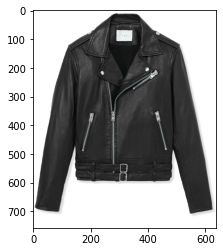

In [ ]:
plt.imshow(result)

#이미지 RGB값 재정렬
img=cv2.cvtColor(result,cv2.COLOR_BGR2RGB)

img = img.reshape(-1,3)

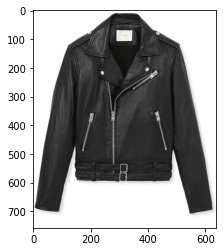

In [ ]:
#이미지 RGB값 재정렬
img=cv2.cvtColor(result,cv2.COLOR_BGR2RGB)
plt.imshow(img)

img = img.reshape(-1,3)

클러스터링 시작

In [ ]:
kmeans=KMeans(n_clusters=3)
s=kmeans.fit(img)

labels=kmeans.labels_
print(labels)
labels=list(labels)

[1 1 1 ... 1 1 1]


In [ ]:
centroid=kmeans.cluster_centers_
print(centroid)

[[ 71.27854216  71.27808126  71.03118812]
 [251.80456545 251.81320597 251.69608413]
 [ 40.44016859  40.42897798  40.2591103 ]]


In [ ]:
percent=[]
for i in range(len(centroid)):
  j=labels.count(i)
  j=j/(len(labels))
  percent.append(j)
print(percent)

[0.12132232637321216, 0.43839443632131153, 0.4402832373054763]


In [ ]:
print(type(centroid))
centerList = centroid.tolist()
print(centerList)
print(percent)


<class 'numpy.ndarray'>
[[71.27854216457067, 71.27808125637625, 71.03118811881046], [251.80456544650076, 251.81320596935655, 251.69608412846242], [40.440168588209744, 40.42897798096594, 40.25911030220769]]
[0.12132232637321216, 0.43839443632131153, 0.4402832373054763]


In [ ]:
sorted_center = []
sorted_percent = []

for i in range(len(centerList)):
    idx = percent.index(max(percent))
    sorted_center.append(centerList[idx])
    sorted_percent.append(percent[idx])
    del percent[idx]

percent = sorted_percent
print(percent)
print(sorted_center)


[0.4402832373054763, 0.43839443632131153, 0.12132232637321216]
[[40.440168588209744, 40.42897798096594, 40.25911030220769], [251.80456544650076, 251.81320596935655, 251.69608412846242], [71.27854216457067, 71.27808125637625, 71.03118811881046]]


In [ ]:
centroid = np.array(sorted_center)

center 값을 percent 순으로 정렬함

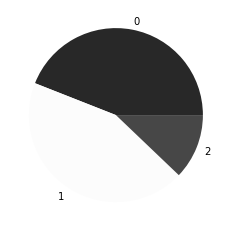

In [ ]:
plt.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)))
plt.show()

centroid 값을 color name으로 표현하기 위한 변환 작업

In [ ]:
centerList = centroid.tolist()

first_color = tuple(map(int, centerList[0]))
print(first_color)

(40, 40, 40)


In [ ]:
from scipy.spatial import KDTree
from webcolors import rgb_to_name, CSS3_HEX_TO_NAMES, hex_to_rgb

def convert_rgb_to_names(rgb_tuple):
    
    # a dictionary of all the hex and their respective names in css3
    css3_db = CSS3_HEX_TO_NAMES
    names = []
    rgb_values = []
    for color_hex, color_name in css3_db.items():
        names.append(color_name)
        rgb_values.append(hex_to_rgb(color_hex))
    
    kdt_db = KDTree(rgb_values)
    distance, index = kdt_db.query(rgb_tuple)
    color = names[index]
    return color

first_color_name = convert_rgb_to_names(first_color)

In [ ]:
if "white" in first_color_name:
    second_color = tuple(map(int, centerList[1]))
    print(second_color)
    second_color_name = convert_rgb_to_names(second_color)
    print(second_color_name)
else:
    print(first_color_name)

darkslategray
